8


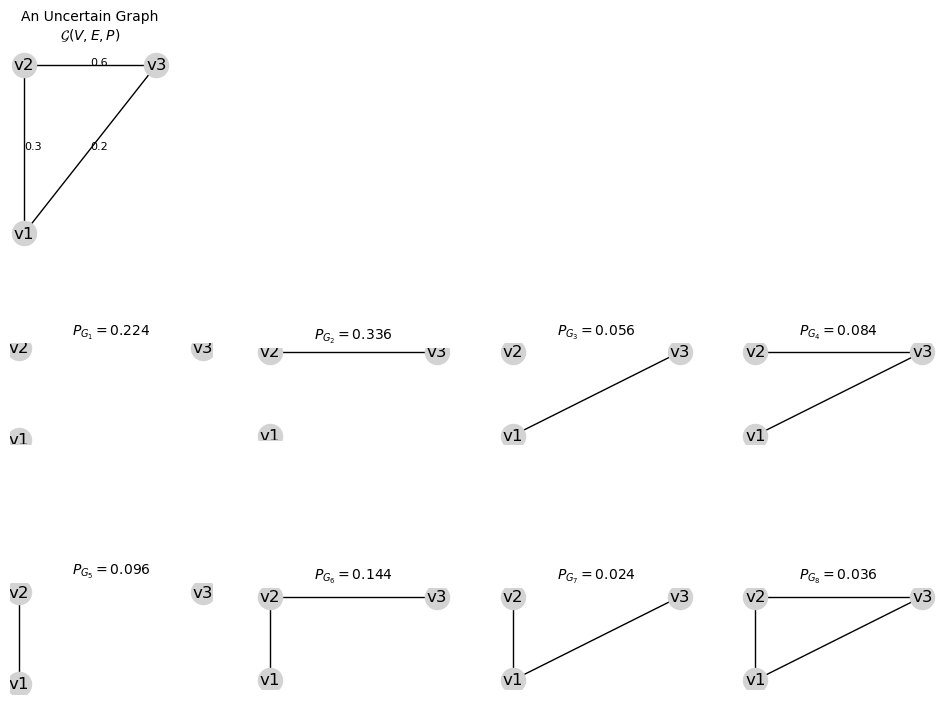

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product
from matplotlib.backends.backend_pdf import PdfPages
import math

# Define uncertain edges with probabilities
edges = {
    ('v1', 'v2'): 0.3,
    ('v1', 'v3'): 0.2,
    ('v2', 'v3'): 0.6
}

nodes = ['v1', 'v2', 'v3']
edge_list = list(edges.keys())
prob_list = list(edges.values())

# Generate all possible subsets of edges (2^3 = 8)
worlds = list(product([0, 1], repeat=len(edges)))
print(len(worlds))

# Layout for all graphs
pos = {'v1': (0, 0), 'v2': (0, 0.5), 'v3': (1, 0.5), 'v4': (1,0)}

def draw_graph(ax, edge_mask, idx, prob):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    included_edges = [e for include, e in zip(edge_mask, edge_list) if include]
    G.add_edges_from(included_edges)
    nx.draw(G, pos, with_labels=True, node_color='lightgray', edge_color='black', ax=ax)
    ax.set_title(f"$P_{{G_{{{idx}}} }} = {prob:.3f}$", fontsize=10)
    ax.axis('off')
    ax.set_aspect('equal')


def calculate_probability(mask):
    p = 1.0
    for include, prob in zip(mask, prob_list):
        p *= prob if include else (1 - prob)
   
    return p

# Compute grid size dynamically
total = len(worlds) + 1  # +1 for uncertain graph
cols = 5
rows = math.ceil(total / cols)

# Create PDF
with PdfPages("uncertain_graph_worlds.pdf") as pdf:
    # Compute layout: uncertain graph on top, worlds below
    num_worlds = len(worlds)
    cols = 4  # You can adjust columns if needed
    rows = math.ceil(num_worlds / cols) + 1  # +1 row for the uncertain graph

    fig = plt.figure(figsize=(cols * 3, rows * 3))

    # Uncertain graph spans the full top row
    ax1 = fig.add_subplot(3, 5, 1)  # 1 full-width subplot
    G_base = nx.Graph()
    G_base.add_nodes_from(nodes)
    G_base.add_edges_from(edge_list)
    nx.draw(G_base, pos, with_labels=True, node_color='lightgray', edge_color='black', ax=ax1)
    for (u, v), p in edges.items():
        x = (pos[u][0] + pos[v][0]) / 2
        y = (pos[u][1] + pos[v][1]) / 2
        ax1.text(x, y, f"{p:.1f}", fontsize=8)
    ax1.set_title("An Uncertain Graph\n$\\mathcal{G}(V, E, P)$", fontsize=10)
    ax1.axis('off')

    # Possible worlds in rows below (starting from subplot 1 in a new grid)
    for i, mask in enumerate(worlds):
        row_offset = 1  # skip row 0 (uncertain graph)
        ax = fig.add_subplot(rows, cols, (row_offset * cols) + i + 1)
        
        prob = calculate_probability(mask)
        draw_graph(ax, mask, i + 1, prob)

    
